<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Disease Prediction**

Objective
1. Provide the best performing model to determine probability for a patient having a heart disease or attack.

2. Providing the most important drivers for a heart disease or attack.

# **Phase 1: Data Understanding & Preprocessing**
Step 1. Import Libraries and Load Dataset

In [ ]:
import pandas
import numpy
import matplotlib
import seaborn
import sklearn

#Load data set
df = pandas.read_csv('heartdisease.csv')
print(df.head())



   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

Step 2.1 Data Understanding & Preprocessing


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

Step 2.2: Handle Missing Values

Action: Identify and address missing values if any.

Step 2.3: Correcting Data Types (if necessary)

Action: Ensure all columns have the appropriate data type. For instance, binary flags (HighBP, HighChol, etc.) should ideally be treated as categorical (or boolean for some operations) even if they're loaded as integers. Age, Education, and Income are binned categories and should be treated as such.

In [ ]:
print(df.isnull().sum())
print(df.dtypes)

# Convert binary flags to category type
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack']
for col in binary_cols:
    df[col] = df[col].astype('category')

# Convert binned numeric to category type
binned_cols = ['Age', 'Education', 'Income', 'Sex']
for col in binned_cols:
    df[col] = df[col].astype('category')

# Define mappings for binary columns to descriptive labels
binary_value_mappings = {
    0: 'No',
    1: 'Yes'
}

for col in binary_cols:
    # Apply descriptive labels based on common binary 0/1 meaning
    if col == 'HeartDiseaseorAttack':
        df[col] = df[col].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    elif col == 'Sex':
        df[col] = df[col].map({0: 'Female', 1: 'Male'})
    else: # For other binary columns like HighBP, HighChol, Smoker etc.
        df[col] = df[col].map(binary_value_mappings)

    # Crucially, ensure the column is set to 'category' dtype
    df[col] = df[col].astype('category')

# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}
for col, mapping in binary_cols_to_map.items():
    df[col] = df[col].astype('category').map(mapping)

# Convert other binned numeric columns to category type (Age, Education, Income)
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    df[col] = df[col].astype('category')

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
MentHlth                float64
PhysHlth                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


# **Phase 2: Exploratory Data Analysis (EDA)**
Step 1: Univariate Analysis
1.1 Analysis of Numerical features BMI,Mental health , Physical health

Action: Understand the distribution of individual features.



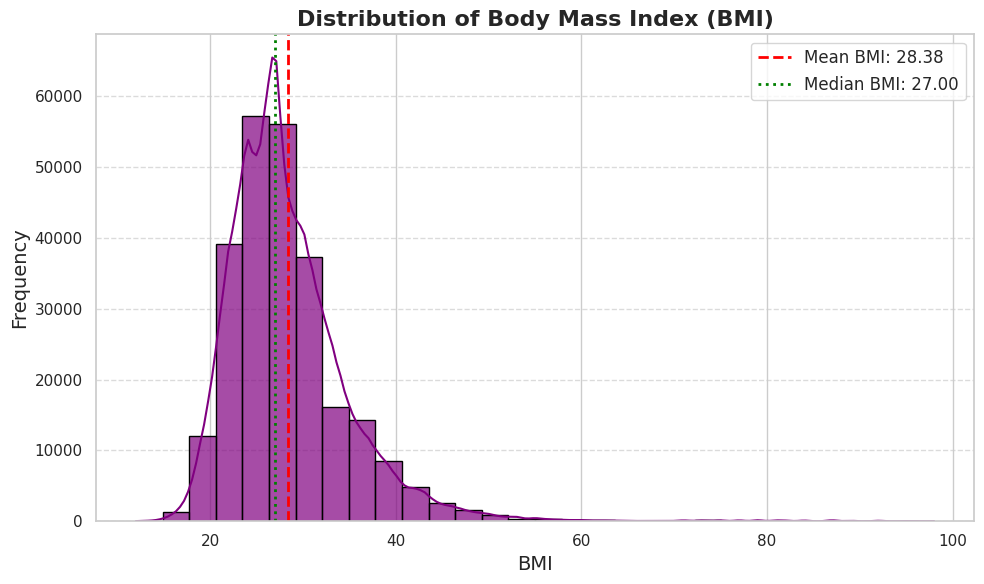

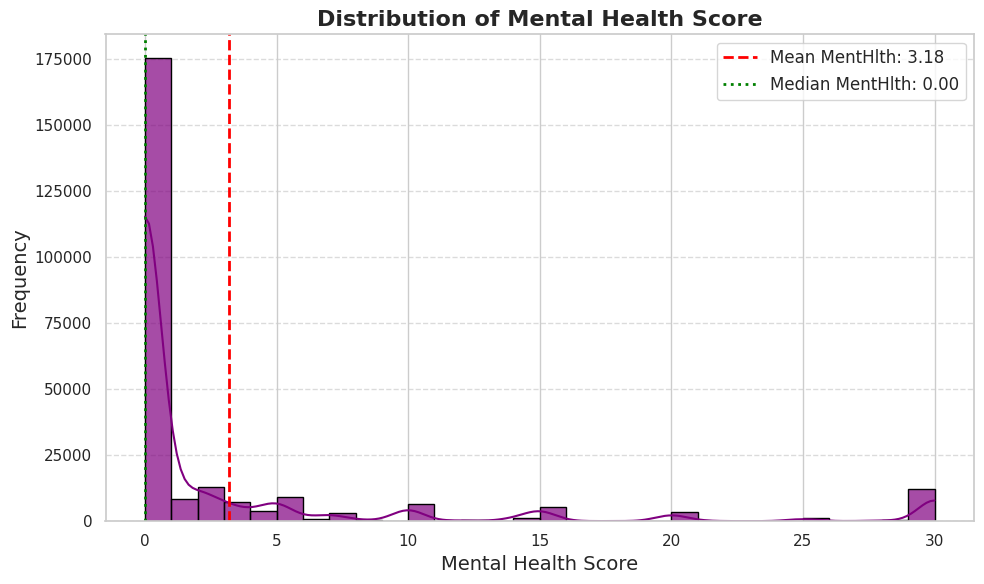

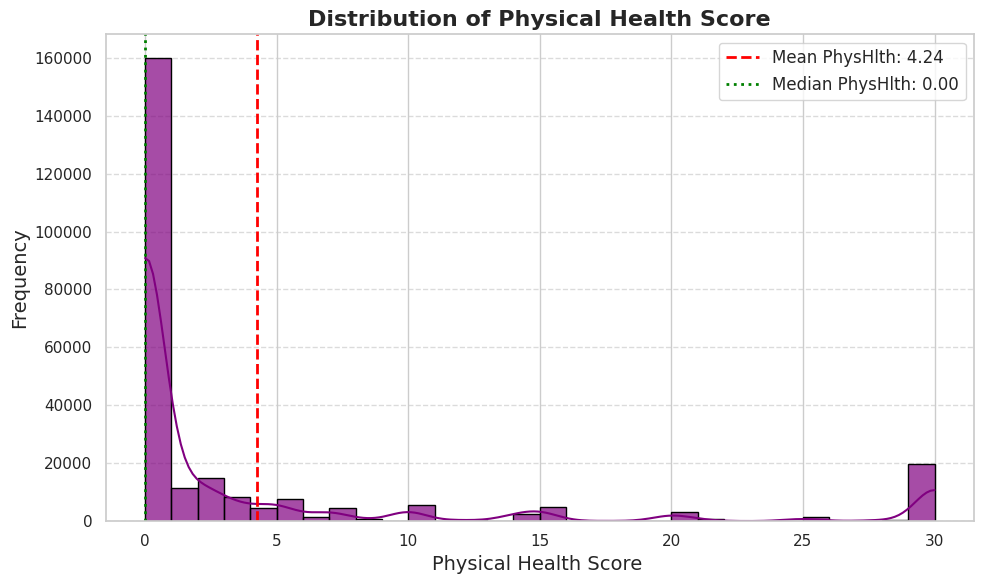

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']

# Histogram for BMI
# Calculate mean and median BMI
mean_bmi = df['BMI'].mean()
median_bmi = df['BMI'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE
sns.histplot(df['BMI'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Mean BMI: {mean_bmi:.2f}')
plt.axvline(median_bmi, color='green', linestyle=':', linewidth=2, label=f'Median BMI: {median_bmi:.2f}')

# Customize title and labels
plt.title('Distribution of Body Mass Index (BMI)', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# show the plot
plt.show()

# KDE plot for MentHlth
# Calculate mean and median for MentHlth
mean_menthlth = df['MentHlth'].mean()
median_menthlth = df['MentHlth'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE for MentHlth
sns.histplot(df['MentHlth'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_menthlth, color='red', linestyle='--', linewidth=2, label=f'Mean MentHlth: {mean_menthlth:.2f}')
plt.axvline(median_menthlth, color='green', linestyle=':', linewidth=2, label=f'Median MentHlth: {median_menthlth:.2f}')

# Customize title and labels
plt.title('Distribution of Mental Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Mental Health Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

# KDE plot for PhysHlth
# Calculate mean and median for MentHlth
mean_menthlth = df['PhysHlth'].mean()
median_menthlth = df['PhysHlth'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE for MentHlth
sns.histplot(df['PhysHlth'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_menthlth, color='red', linestyle='--', linewidth=2, label=f'Mean PhysHlth: {mean_menthlth:.2f}')
plt.axvline(median_menthlth, color='green', linestyle=':', linewidth=2, label=f'Median PhysHlth: {median_menthlth:.2f}')

# Customize title and labels
plt.title('Distribution of Physical Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Physical Health Score ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

Univariate Analysis
1.2 Analysis of Categorical Binned Variables (Age, Education, Income)
Bar plots showing counts per bin.

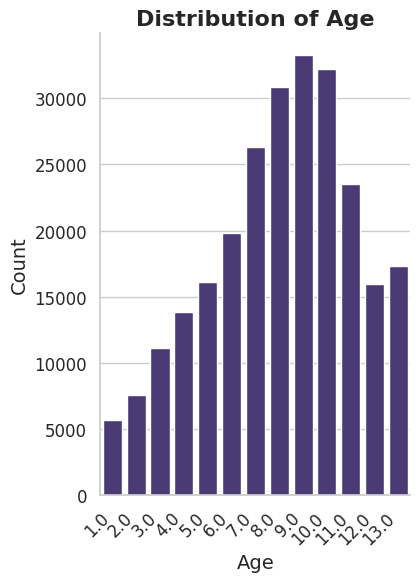

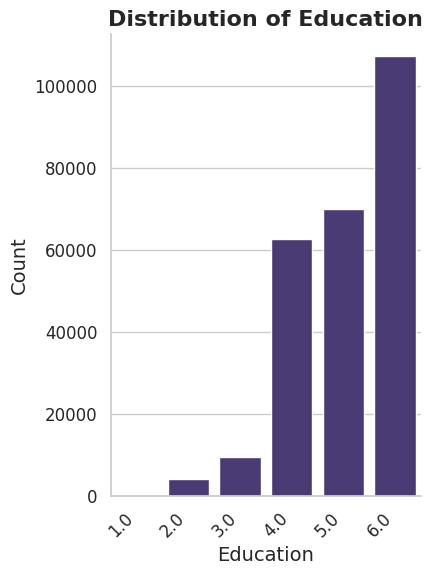

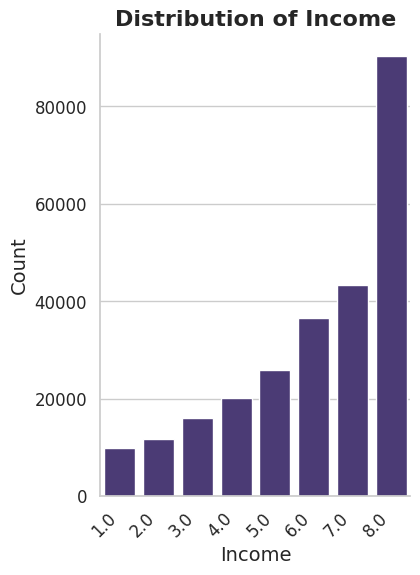

In [ ]:
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    plt.figure(figsize=(4, 6))
    sns.set_theme(style="whitegrid")  # Or style="darkgrid", "white", "ticks"
    sns.set_palette('viridis')  # Or 'coolwarm', 'cubehelix', 'deep', etc.

    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right',fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()  # Removes top and right spines for cleaner look
    plt.show()




# **•	Multivariate Analysis:**
o	Correlation Analysis: Compute the correlation matrix between numerical features and the target variable. Visualize this using a heatmap to identify strong relationships.
o	Target Variable Analysis: Analyze the distribution of HeartDiseaseorAttack. This is crucial for understanding class imbalance. Plot the count of positive and negative cases.
o	Feature-Target Relationships: Use box plots (for numerical features vs. binary target) and stacked bar plots (for categorical features vs. binary target) to visualize how each feature relates to the likelihood of heart disease.


/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


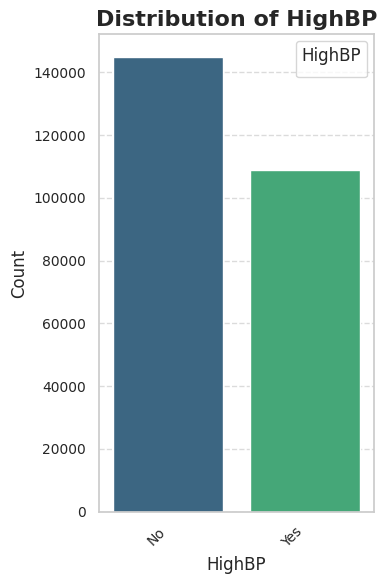

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


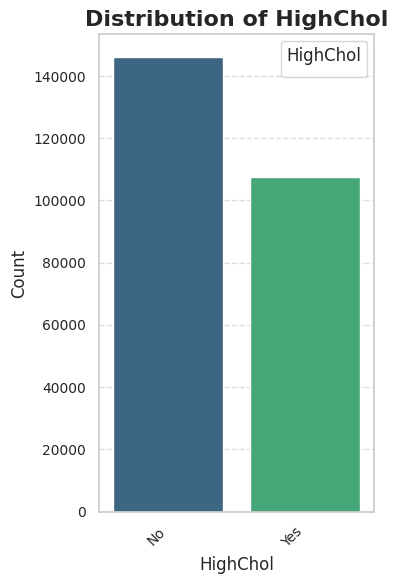

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


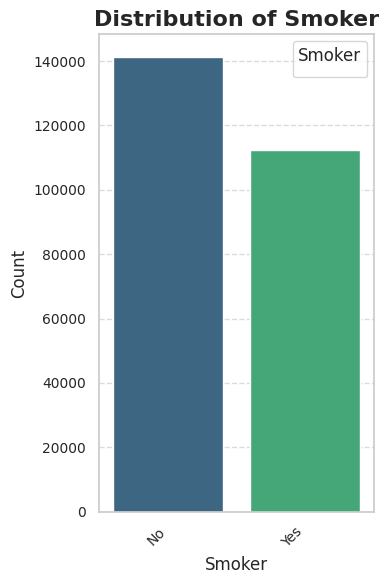

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


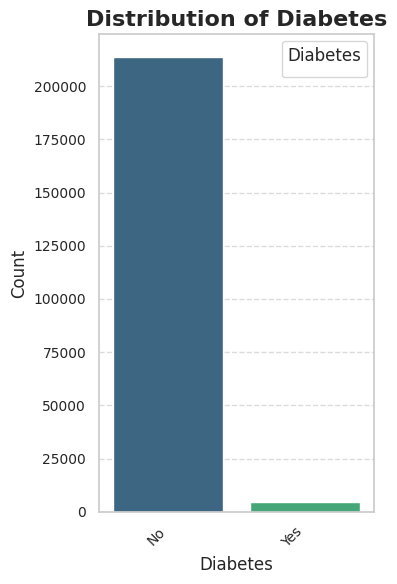

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


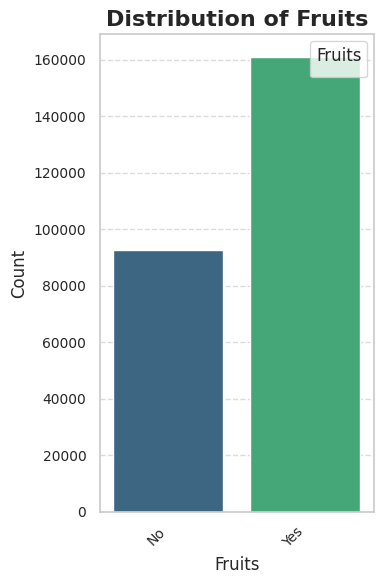

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


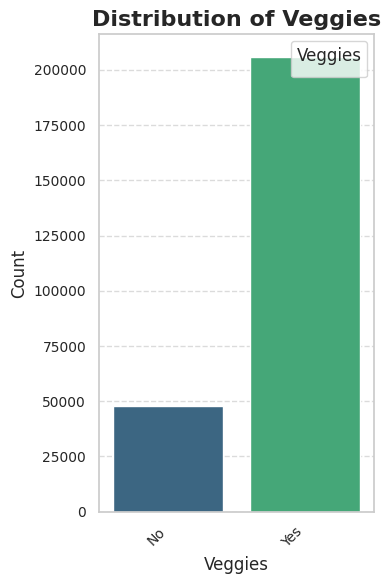

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


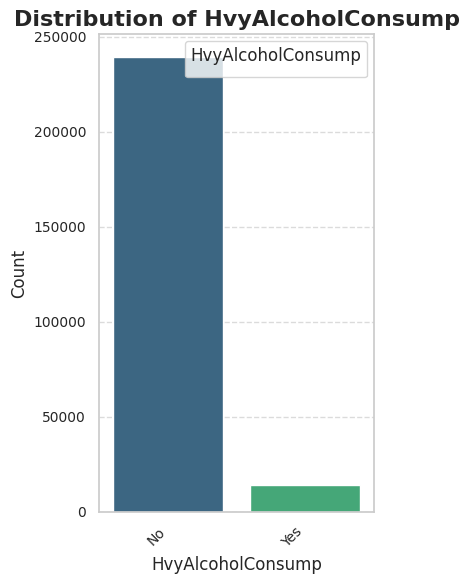

/tmp/ipython-input-9-3965957634.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


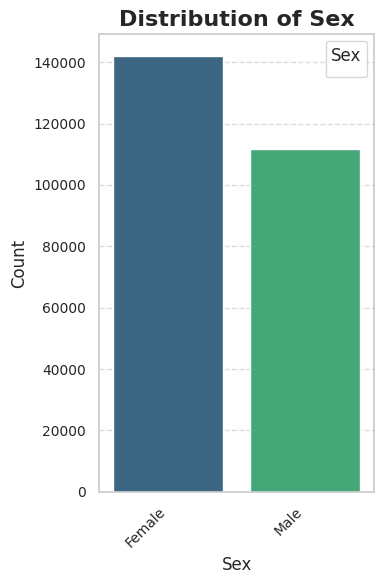

In [ ]:
# --- 1. Categorical Feature vs. Target Variable Relationships (Stacked Bar Charts) # --- 1. Target Variable Analysis: Distribution of HeartDiseaseorAttack --- ---
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('heartdisease.csv')  # Replace with your dataset path

# Define the specific list of categorical columns for univariate analysis
target_cols_for_univariate = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack','Sex']

# Define mappings for binary columns to descriptive labels
binary_value_mappings = {
    0: 'No',
    1: 'Yes'
}

# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}

# Specific mapping for Sex (if it were in the list)
sex_mapping = {0: 'Female', 1: 'Male'}

# Process columns to ensure correct categorical type and labels
for col in target_cols_for_univariate:
    # Apply descriptive labels based on common binary 0/1 meaning
    if col == 'HeartDiseaseorAttack':
        df[col] = df[col].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    elif col == 'Sex':
        df[col] = df[col].map({0: 'Female', 1: 'Male'})
    else: # For other binary columns like HighBP, HighChol, Smoker etc.
        df[col] = df[col].map(binary_value_mappings)

    # Crucially, ensure the column is set to 'category' dtype
    df[col] = df[col].astype('category')


# Select all categorical columns excluding the target variable for plotting against the target
categorical_features_for_plotting = df.select_dtypes(include='category').columns.drop('HeartDiseaseorAttack')

# Define a color palette for stacked bar charts
palette_choice = 'viridis'

for col in categorical_features_for_plotting:
    plt.figure(figsize=(4, 6))
  # Fix: Assign x to hue and set legend=False to apply palette to individual bars and suppress warning
    sns.countplot(x=df[col], hue=df[col], palette="viridis" , legend=False)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend(title=col, loc='upper right', fontsize=10)
    plt.show()
    plt.close()



o	Target Variable Analysis: Analyze the distribution of HeartDiseaseorAttack. This is crucial for understanding class imbalance. Plot the count of positive and negative cases.
o	Correlation Analysis: Compute the correlation matrix between numerical features and the target variable. Visualize this using a heatmap to identify strong relationships.

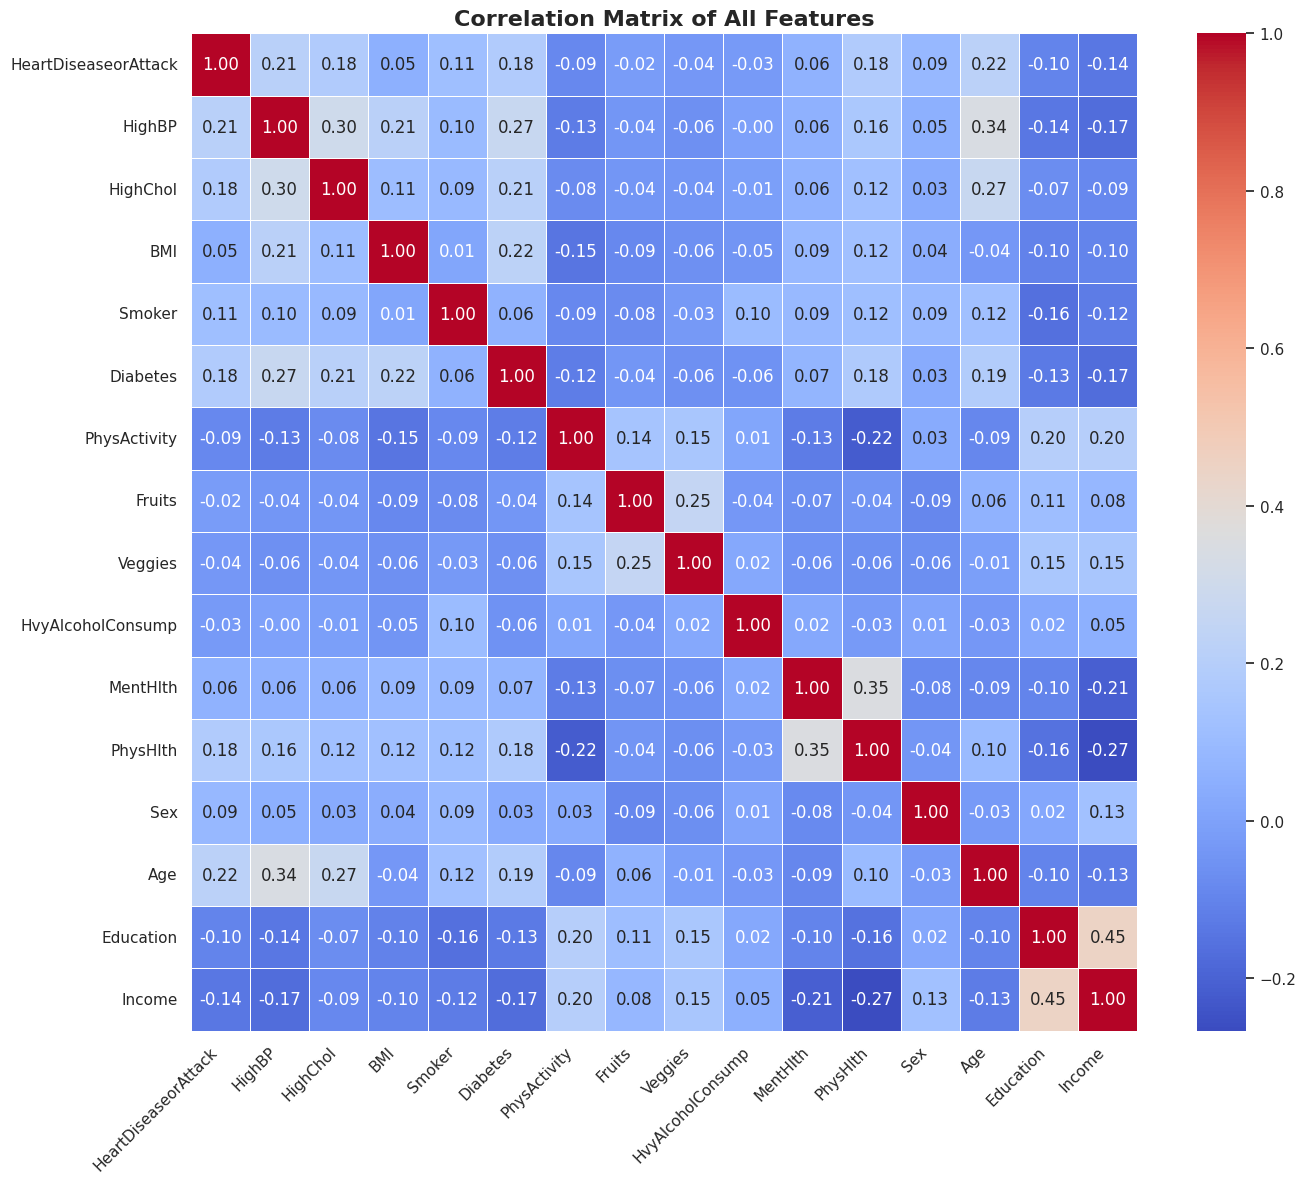

/tmp/ipython-input-10-371507574.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')


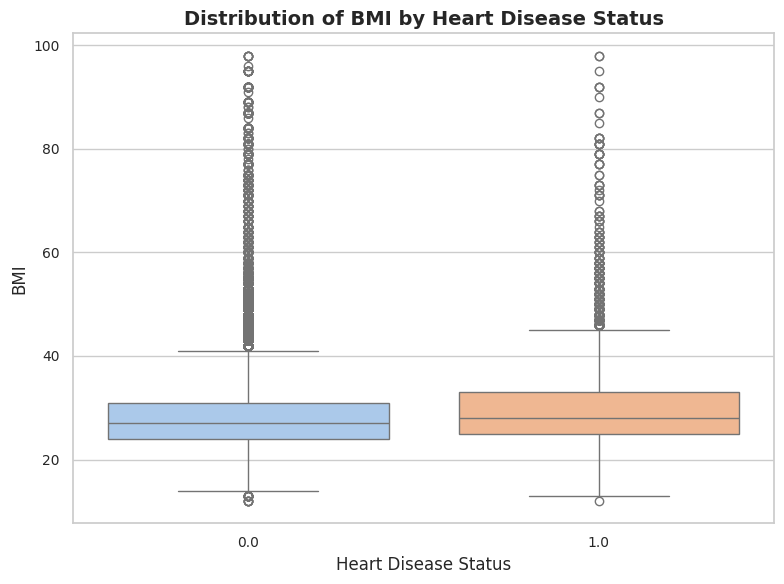

/tmp/ipython-input-10-371507574.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')


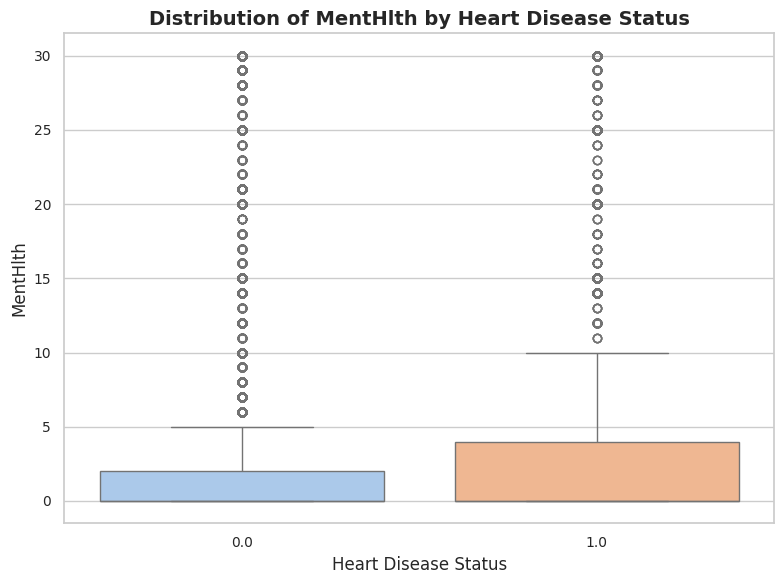

/tmp/ipython-input-10-371507574.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')


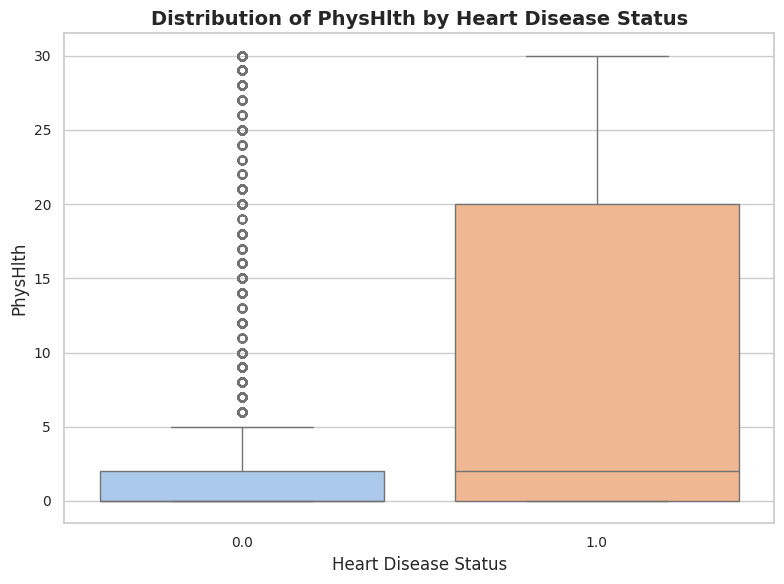

In [ ]:
# --- # --- 2. Correlation Matrix --- ---
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 # Prepare a DataFrame for correlation analysis where all relevant columns are numeric
    # Load Dataset
df = pd.read_csv('heartdisease.csv')  # Replace with your dataset path
df_corr = df.copy()

# Numerical columns (BMI, MentHlth, PhysHlth) are already suitable for correlation

plt.figure(figsize=(14, 12))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()

# --- 3. Numerical Feature vs. Target Variable Relationships (Box Plots) ---

numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
# 'HeartDiseaseorAttack' column in df is already mapped to descriptive labels from previous steps

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')
    plt.title(f'Distribution of {col} by Heart Disease Status', fontsize=14, fontweight='bold')
    plt.xlabel('Heart Disease Status', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close()

# o	Feature-Target Relationships:
Use box plots (for numerical features vs. binary target) and stacked bar plots (for categorical features vs. binary target) to visualize how each feature relates to the likelihood of heart disease.

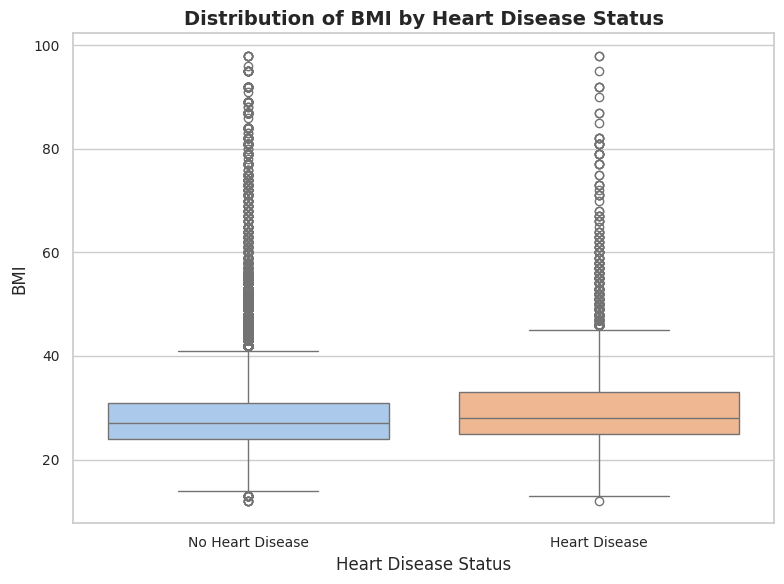

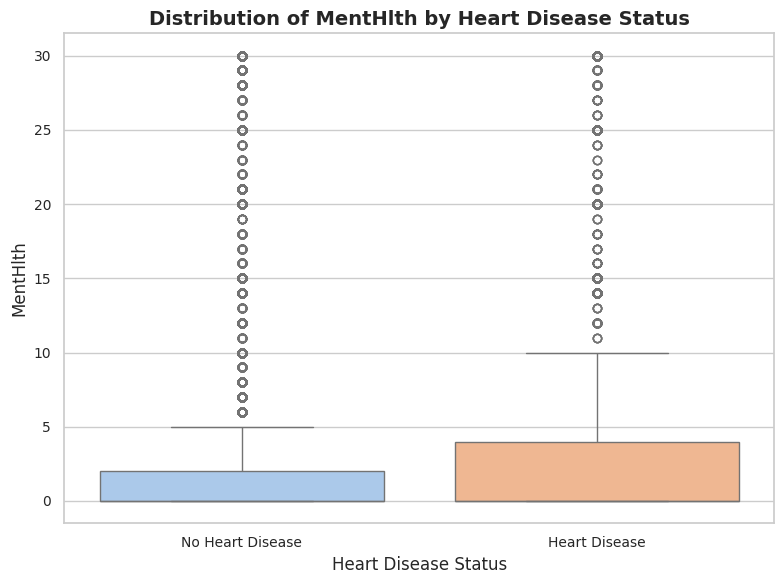

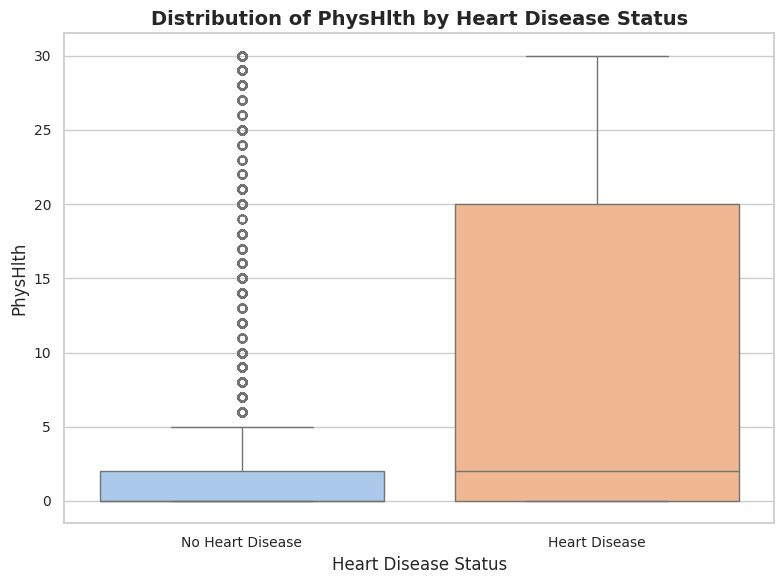

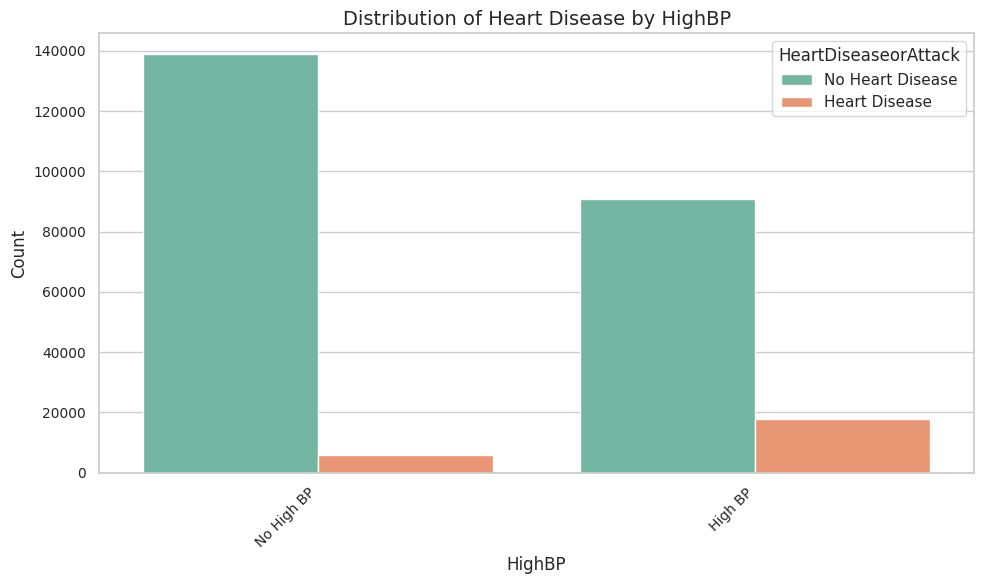

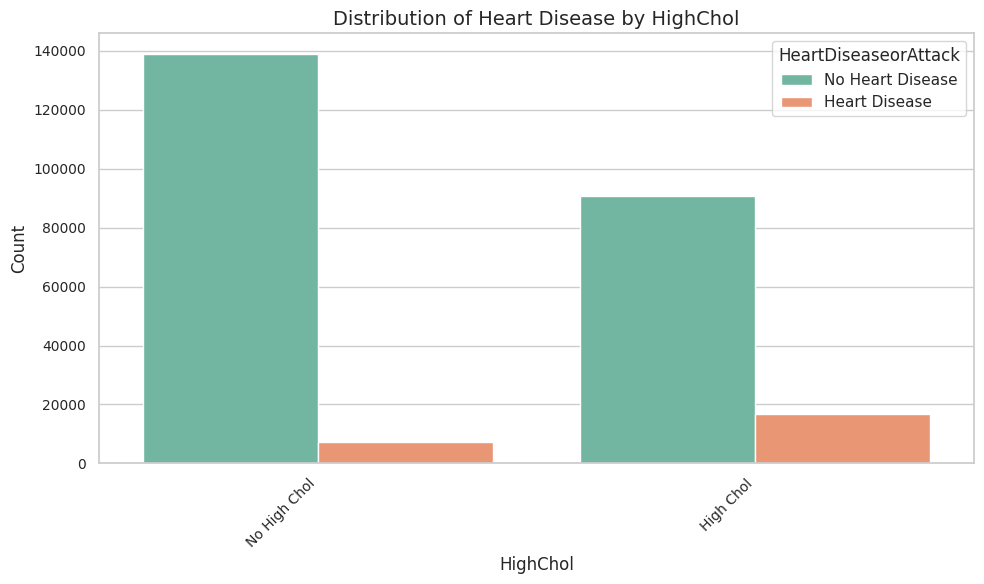

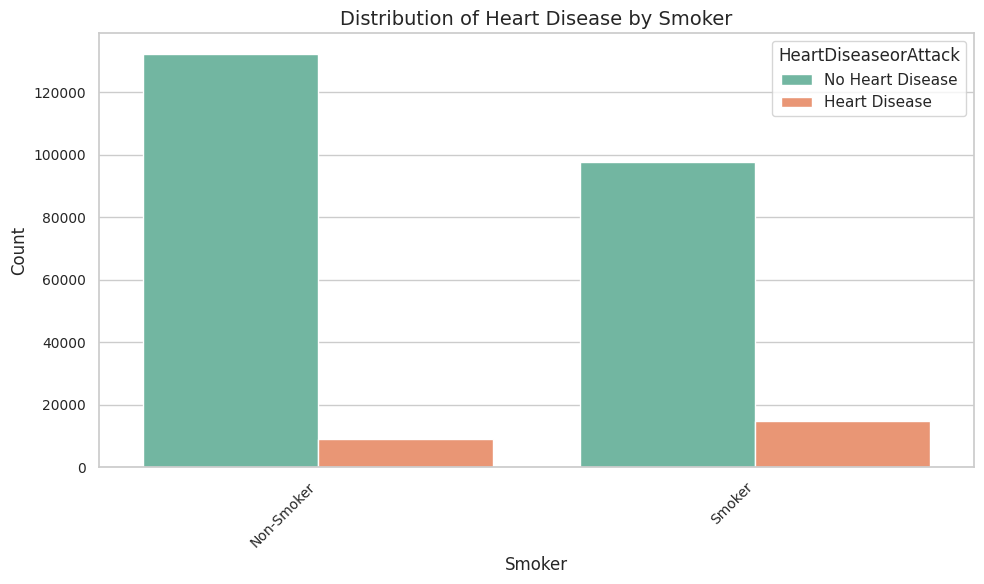

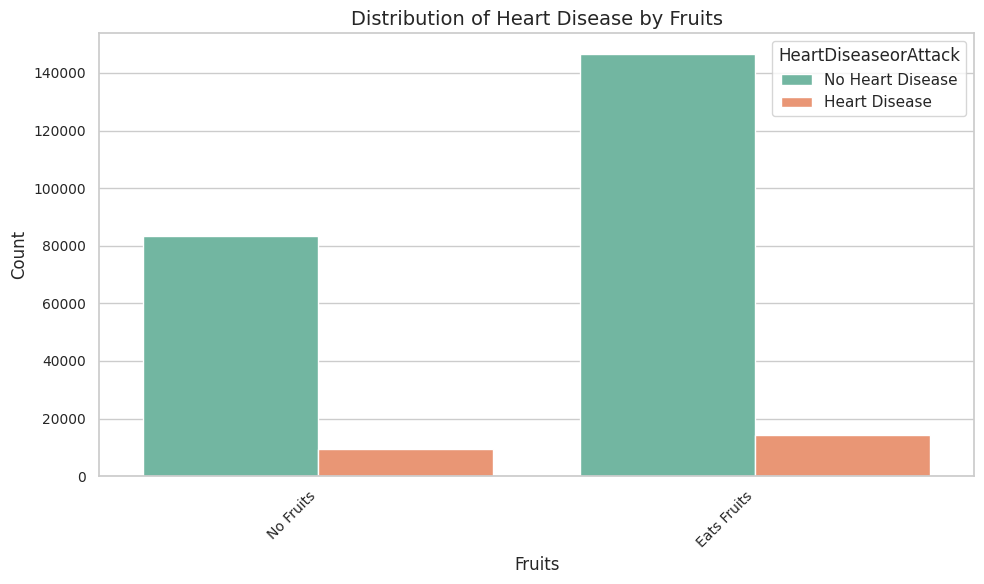

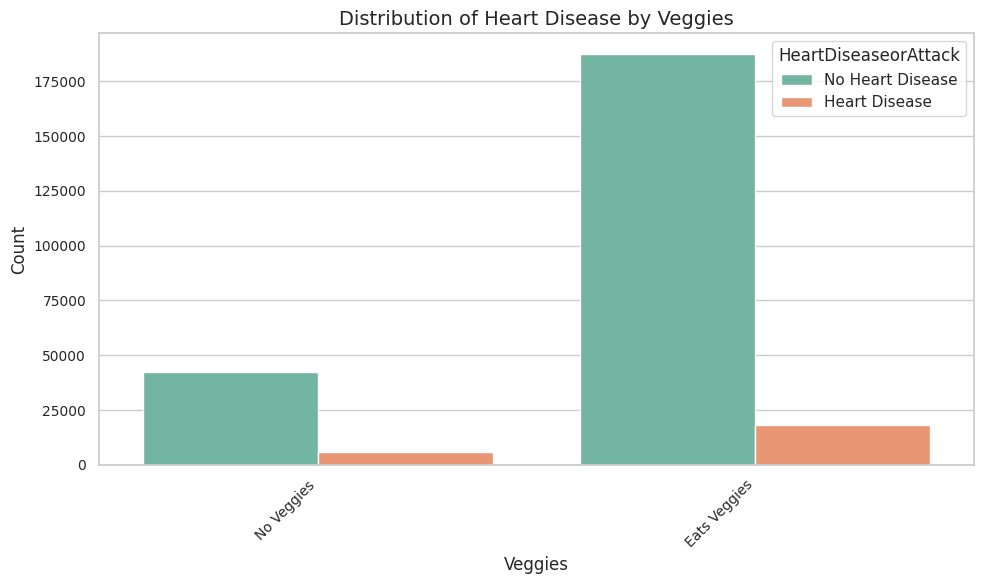

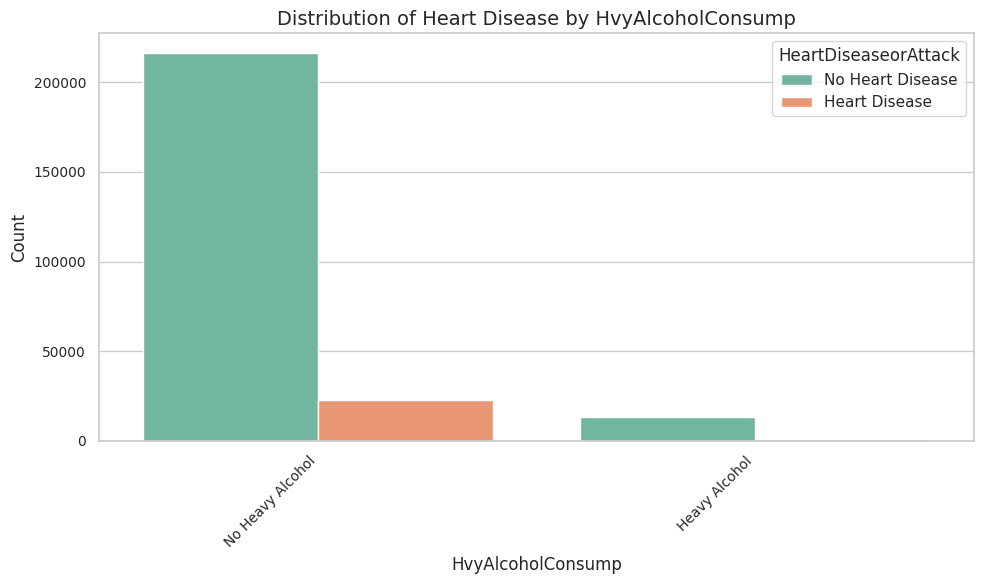

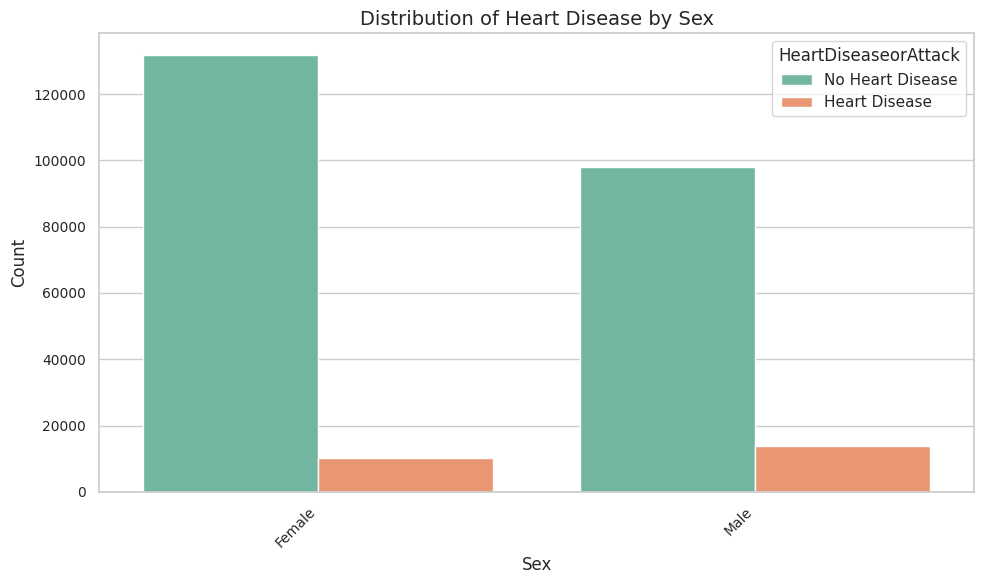

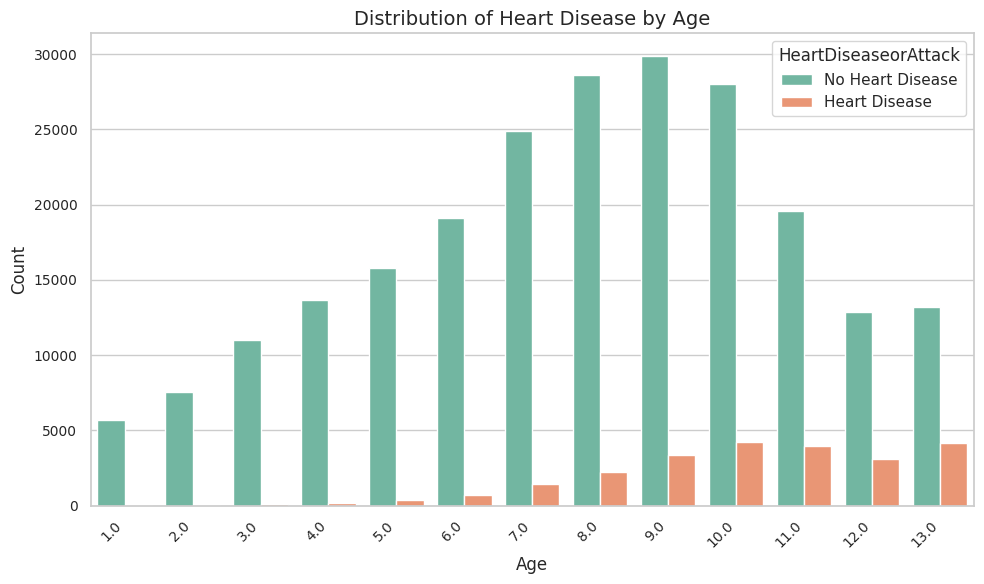

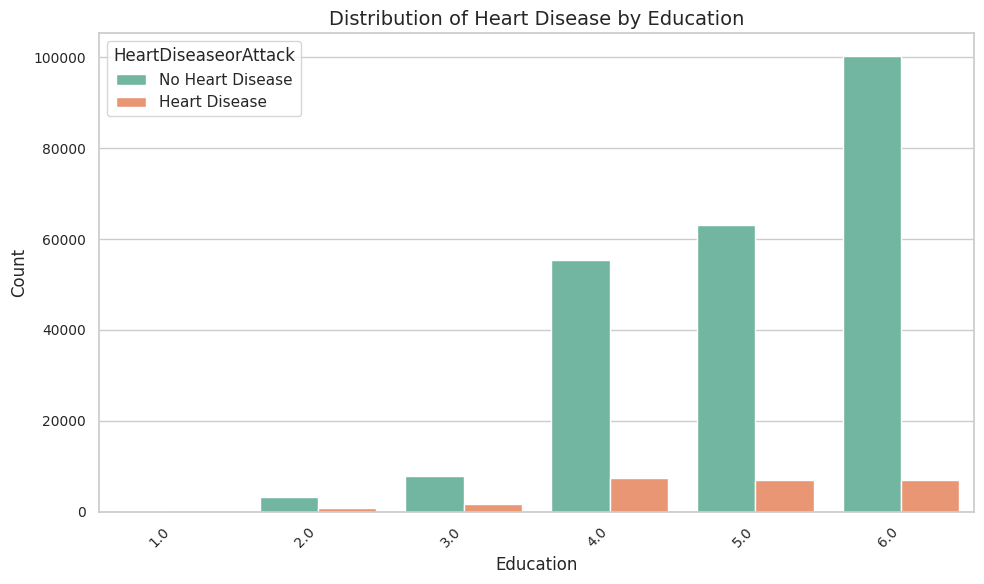

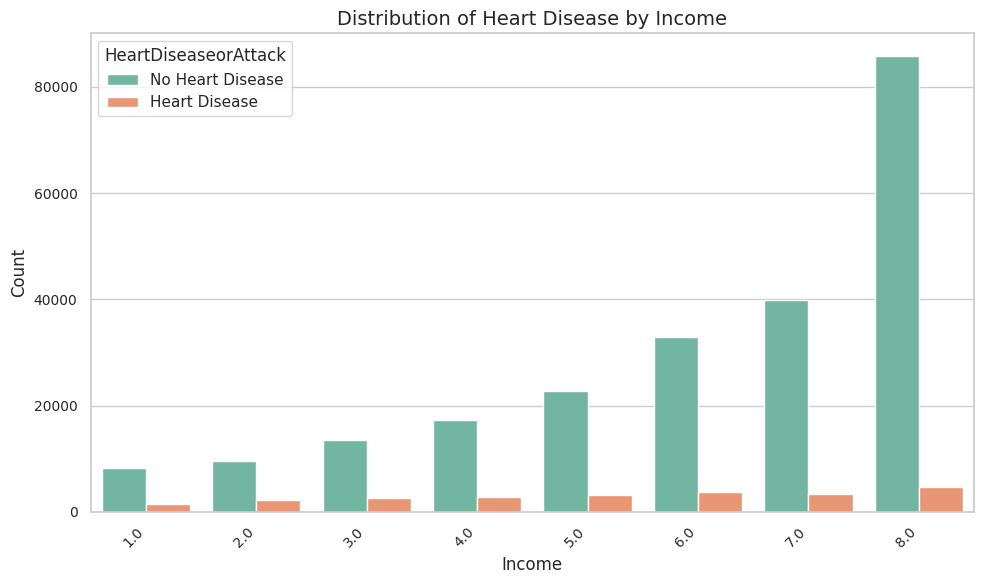

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heartdisease.csv')

# --- Data Preparation (Descriptive Labels for 'df') ---
# This DataFrame 'df' will be used for plots requiring descriptive labels.

# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}

for col, mapping in binary_cols_to_map.items():
    if col in df.columns:
        df[col] = df[col].astype('category').map(mapping)

# Convert other binned numeric columns to category type (Age, Education, Income)
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# --- 3. Feature-Target Relationships ---

# 3a. Box Plots (Numerical Features vs. Binary Target)
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    # Assign the 'x' variable ('HeartDiseaseorAttack') to 'hue' for correct palette application
    sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, hue='HeartDiseaseorAttack', palette='pastel', legend=False)
    plt.title(f'Distribution of {col} by Heart Disease Status', fontsize=14, fontweight='bold')
    plt.xlabel('Heart Disease Status', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
   # plt.savefig(f'{col}_HeartDisease_BoxPlot.png')
    plt.show()
    plt.close()

# 3b. Stacked Bar Plots (Categorical Features vs. Binary Target)
categorical_features_for_plotting = df.select_dtypes(include='category').columns.drop('HeartDiseaseorAttack', errors='ignore')

# Use a discrete color palette suitable for two categories
discrete_palette_choice = 'Set2'

for col in categorical_features_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='HeartDiseaseorAttack', palette=discrete_palette_choice)
    plt.title(f'Distribution of Heart Disease by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
   # plt.savefig(f'{col}_HeartDisease_Stacked_Chart.png')
    plt.show()
    plt.close()

# •	Feature Engineering:
o	Based on EDA and domain knowledge, consider creating new features. For example:
	HealthScore: A composite score from MentHlth and PhysHlth.
	DietaryHealth: A combined feature from Fruits and Veggies.
	Age-BMI Interaction: An interaction term between age and BMI, as the impact of BMI might vary with age.
	Cholesterol-BloodPressure Interaction: An interaction of HighBP and HighChol.


In [ ]:
import pandas as pd

# Load the dataset to perform feature engineering
df_engineered = pd.read_csv('heartdisease.csv')

# --- Feature Engineering ---

# 1. HealthScore: A composite score from MentHlth and PhysHlth
# Assuming MentHlth and PhysHlth represent number of days of bad health (0-30 days),
# a higher score indicates better health (less bad days).
# Max value for MentHlth and PhysHlth is 30.
df_engineered['HealthScore'] = (30 - df_engineered['MentHlth']) + (30 - df_engineered['PhysHlth'])

# 2. DietaryHealth: A combined feature from Fruits and Veggies
# Both are binary (0/1). Summing them creates a score from 0 to 2.
# 0 = No Fruits, No Veggies; 1 = Either Fruits or Veggies; 2 = Both Fruits and Veggies.
df_engineered['DietaryHealth'] = df_engineered['Fruits'] + df_engineered['Veggies']

# 3. Age-BMI Interaction: An interaction term between Age and BMI
# Age is already numerical (binned 1-13), and BMI is numerical.
df_engineered['Age_BMI_Interaction'] = df_engineered['Age'] * df_engineered['BMI']

# 4. Cholesterol-BloodPressure Interaction: An interaction of HighBP and HighChol
# Both are binary (0/1). Product will be 1 if both are 'High', 0 otherwise.
df_engineered['Cholesterol_BP_Interaction'] = df_engineered['HighBP'] * df_engineered['HighChol']

# Display the first few rows with the new features
print("DataFrame with new engineered features (head):")
print(df_engineered.head())

# Display information about the DataFrame to see new column dtypes
print("\nDataFrame information with new engineered features:")
print(df_engineered.info())

DataFrame with new engineered features (head):
   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  HealthScore  DietaryHealth  A

# Binary Classification Experimentation Space
To set up the Binary Classification Experimentation Space, the first crucial step is to split the data into training and testing sets. This ensures that the model's performance can be evaluated on unseen data, providing an unbiased assessment.




# •	Data Splitting: Split your data into training, validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset with engineered features
#df_engineered = pd.read_csv('heartdisease_engineered_features.csv')

# Define features (X) and target (y)
X = df_engineered.drop('HeartDiseaseorAttack', axis=1)
y = df_engineered['HeartDiseaseorAttack']

# Split the data into training and testing sets (80/20 split)
# Stratify by y to maintain the proportion of HeartDiseaseorAttack in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Optional: Print the class distribution in train and test sets to verify stratification
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (202944, 19)
Shape of X_test: (50736, 19)
Shape of y_train: (202944,)
Shape of y_test: (50736,)

Class distribution in y_train:
HeartDiseaseorAttack
0.0    0.905816
1.0    0.094184
Name: proportion, dtype: float64

Class distribution in y_test:
HeartDiseaseorAttack
0.0    0.905807
1.0    0.094193
Name: proportion, dtype: float64


--- Training and Evaluating LDA ---
Accuracy: 0.9009
ROC AUC: 0.8188
Confusion Matrix:
 [[45144   813]
 [ 4214   565]]
Classification Report:
               precision    recall  f1-score       support
0.0            0.914624  0.982310  0.947259  45957.000000
1.0            0.410015  0.118226  0.183531   4779.000000
accuracy       0.900918  0.900918  0.900918      0.900918
macro avg      0.662319  0.550268  0.565395  50736.000000
weighted avg   0.867093  0.900918  0.875321  50736.000000
--------------------------------------------------
--- Training and Evaluating AdaBoost ---
Accuracy: 0.9041
ROC AUC: 0.8220
Confusion Matrix:
 [[45498   459]
 [ 4409   370]]
Classification Report:
               precision    recall  f1-score       support
0.0            0.911656  0.990012  0.949220  45957.000000
1.0            0.446321  0.077422  0.131954   4779.000000
accuracy       0.904052  0.904052  0.904052      0.904052
macro avg      0.678988  0.533717  0.540587  50736.000000
weighted avg   0.867

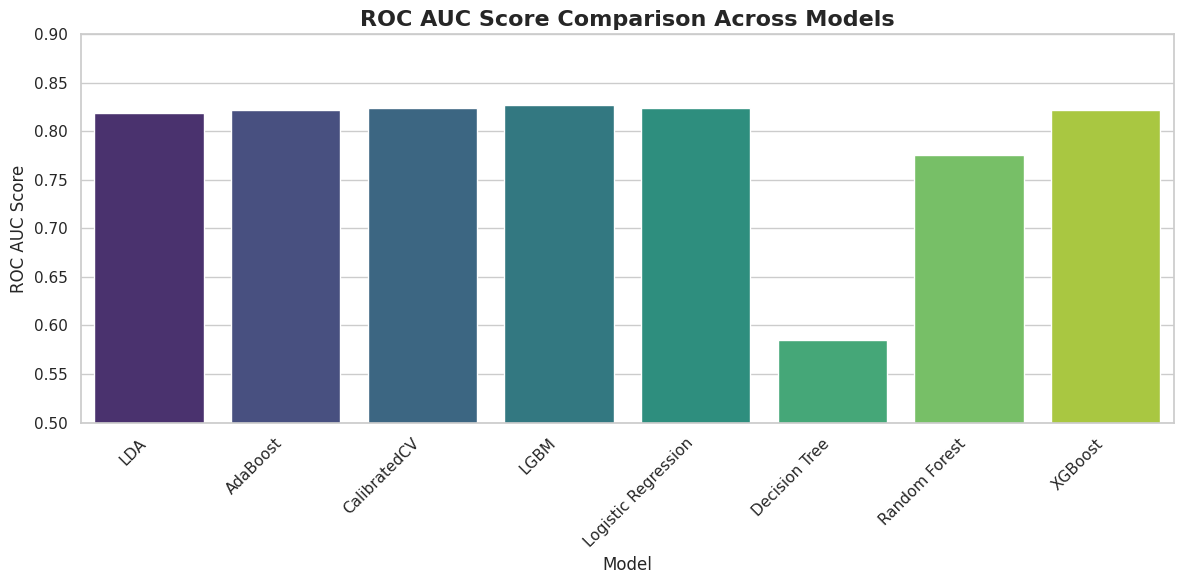

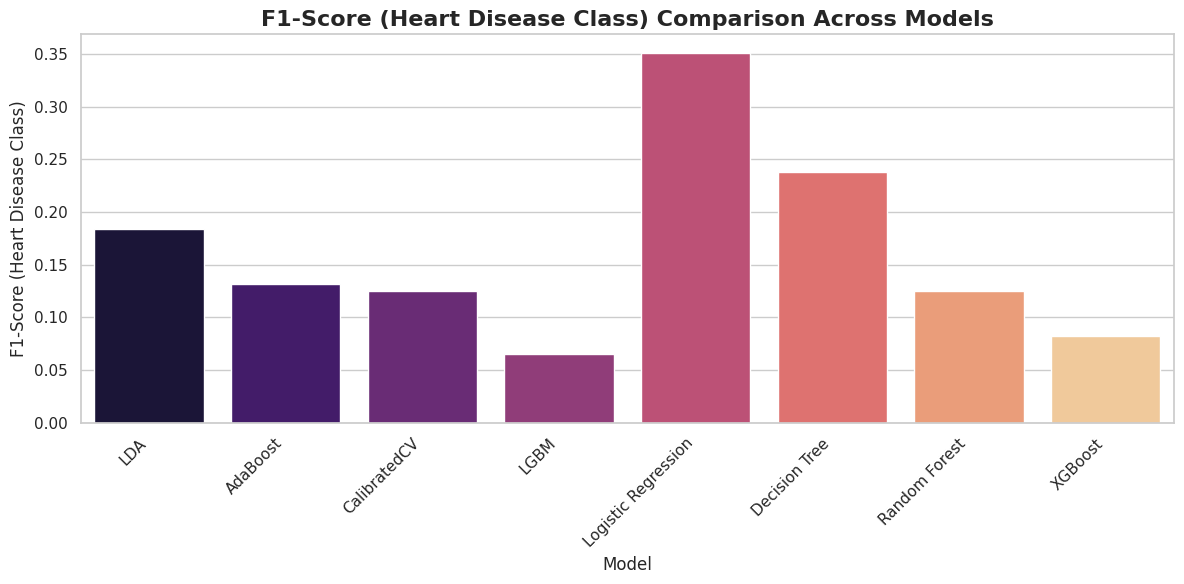

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset with engineered features
#df_engineered = pd.read_csv('heartdisease.csv')

# Define features (X) and target (y)
X = df_engineered.drop('HeartDiseaseorAttack', axis=1)
y = df_engineered['HeartDiseaseorAttack']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Feature Scaling ---
# Scale numerical features for models sensitive to feature scaling (Logistic Regression, SVM, KNN, Neural Networks)
# Although Decision Tree and Random Forest are not scale-sensitive, scaling generally doesn't hurt.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with column names for clarity in results
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# --- Model Implementation and Evaluation ---

models = {
    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'CalibratedCV': CalibratedClassifierCV(),
    'LGBM': LGBMClassifier(),
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"--- Training and Evaluating {name} ---")

    # Use scaled data for Logistic Regression and XGBoost (good practice)
    # Decision Tree and Random Forest can use unscaled data, but scaled data is fine.
    if name == "Logistic Regression":
        model.fit(X_train_scaled_df, y_train)
        y_pred = model.predict(X_test_scaled_df)
        y_pred_proba = model.predict_proba(X_test_scaled_df)[:, 1]
    elif name == "XGBoost":
        model.fit(X_train_scaled_df, y_train) # XGBoost can also benefit from scaling
        y_pred = model.predict(X_test_scaled_df)
        y_pred_proba = model.predict_proba(X_test_scaled_df)[:, 1]
    else: # Decision Tree and Random Forest
        model.fit(X_train, y_train) # Use unscaled data for tree-based models
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]


    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0) # Handle zero division

    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", pd.DataFrame(class_report).transpose())
    print("-" * 50)

# Summarize results in a DataFrame for easy comparison
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'Precision (No HD)', 'Recall (No HD)', 'F1-Score (No HD)', 'Precision (HD)', 'Recall (HD)', 'F1-Score (HD)'])

for name, res in results.items():
    no_hd_metrics = res["Classification Report"]["0.0"]
    hd_metrics = res["Classification Report"]["1.0"]
    summary_df = pd.concat([summary_df, pd.DataFrame([{
        'Model': name,
        'Accuracy': res["Accuracy"],
        'ROC AUC': res["ROC AUC"],
        'Precision (No HD)': no_hd_metrics['precision'],
        'Recall (No HD)': no_hd_metrics['recall'],
        'F1-Score (No HD)': no_hd_metrics['f1-score'],
        'Precision (HD)': hd_metrics['precision'],
        'Recall (HD)': hd_metrics['recall'],
        'F1-Score (HD)': hd_metrics['f1-score']
    }])], ignore_index=True)

print("\n--- Model Performance Summary ---")
print(summary_df.to_string())

# Plotting performance metrics for comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROC AUC', data=summary_df, palette='viridis')
plt.title('ROC AUC Score Comparison Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('ROC AUC Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 0.9) # Set a reasonable y-limit as 0.5 is baseline for ROC AUC
plt.tight_layout()
plt.show()
plt.savefig('ROC_AUC_Comparison.png')
plt.close()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-Score (HD)', data=summary_df, palette='magma')
plt.title('F1-Score (Heart Disease Class) Comparison Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1-Score (Heart Disease Class)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('F1_Score_HD_Comparison.png')
plt.show()
plt.close()

In [5]:
from joblib import dump, load

dump(pipe_smote, 'heart_disease_gb_smote.pkl')   # save
# later
model = load('heart_disease_gb_smote.pkl')
prob = model.predict_proba(heart)[0,1]
print(prob)
print(model.predict(heart))


0.6247365186123682
[1 0 0 ... 0 0 0]


# Using Techniques such as Oversampling, Undersampling to Handle Class-Imbalance
comparison of SMOTE and Random Under Sampling techniques for handling class imbalance in heart disease prediction using a Gradient Boosting Classifier.

Take-aways

Age dwarfs every other variable—risk climbs steeply after ~45.

Income and Education show a strong socioeconomic gradient.

Self-reported poor physical health and the classic vitals (High BP, High Chol, BMI) fill in the clinical picture.

Sex (male) remains predictive even after controlling for the above.

SMOTE PR_AUC: 0.3024168810965574
RandomUnderSampler PR_AUC: 0.31864488522668205
               Feature  Importance
12                 Age    0.380448
14              Income    0.139048
10            PhysHlth    0.120433
0               HighBP    0.102212
13           Education    0.053672
1             HighChol    0.045956
11                 Sex    0.036962
2                  BMI    0.023228
18       Age_grp_35-44    0.020577
15  BMI_cat_Overweight    0.019259
9             MentHlth    0.018306
3               Smoker    0.014181


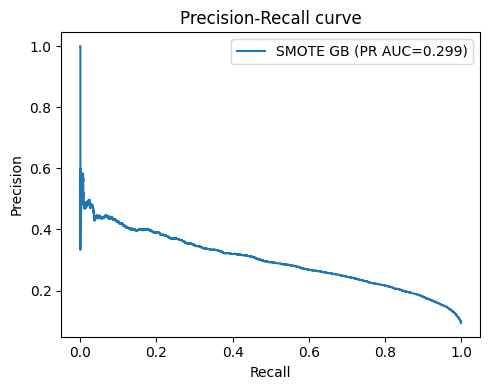

In [1]:
# Heart-disease risk: balanced-training experiment with SMOTE vs RandomUnder + driver importance

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# 1. Load data
heart = pd.read_csv('heartdisease.csv')
heart['HeartDiseaseorAttack'] = heart['HeartDiseaseorAttack'].astype(int)

# 2. Feature engineering – simple, interpretable
heart['BMI_cat'] = pd.cut(heart['BMI'], bins=[0,18.5,25,30,100], labels=['Under/Normal','Overweight','Obese','Severely Obese'])
heart['Age_grp'] = pd.cut(heart['Age'], bins=[0,5,9,11,13], labels=['18-34','35-44','45-54','55+'])

X = heart.drop('HeartDiseaseorAttack', axis=1)
y = heart['HeartDiseaseorAttack']

cat_cols = ['BMI_cat','Age_grp']
num_cols = [c for c in X.columns if c not in cat_cols]

pre = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Helper to return PR-AUC via cross-val
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def pr_auc(model):
    pr_aucs = []
    for train_idx, test_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        probas = model.predict_proba(X.iloc[test_idx])[:,1]
        precision, recall, _ = precision_recall_curve(y.iloc[test_idx], probas)
        pr_aucs.append(auc(recall, precision))
    return np.mean(pr_aucs)

# 3. Oversampling with SMOTE
pipe_smote = ImbPipeline([
    ('pre', pre),
    ('smote', SMOTE(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
])

smote_pr = pr_auc(pipe_smote)
print('SMOTE PR_AUC:', smote_pr)

# 4. Undersampling with RandomUnderSampler
pipe_under = ImbPipeline([
    ('pre', pre),
    ('under', RandomUnderSampler(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
])
under_pr = pr_auc(pipe_under)
print('RandomUnderSampler PR_AUC:', under_pr)

# 5. Fit final SMOTE model on entire data and get feature importances
pipe_smote.fit(X, y)

# feature names
cat_feats = pipe_smote.named_steps['pre'].named_transformers_['cat'].get_feature_names_out(cat_cols)
feat_names = num_cols + list(cat_feats)
importances = pipe_smote.named_steps['gb'].feature_importances_
fi = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
fi = fi.sort_values('Importance', ascending=False).head(12)
print(fi)

# 6. Precision-recall curve on hold-out 20% split for illustration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
pipe_smote.fit(X_train, y_train)
probs = pipe_smote.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, probs)
plt.figure(figsize=(5,4))
plt.plot(recall, precision, label='SMOTE GB (PR AUC='+str(round(auc(recall,precision),3))+')')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate multiple models with class-imbalance strategies on a consistent hold-out split

                Model    PR_AUC   ROC_AUC  Accuracy        F1
0        LogReg_SMOTE  0.307796  0.823744  0.725796  0.349967
1  RandomForest_SMOTE  0.238785  0.784117  0.885564  0.220462
2     GradBoost_SMOTE  0.298898  0.819961  0.858168  0.366103
3     GradBoost_Under  0.313000  0.827936  0.717124  0.348584


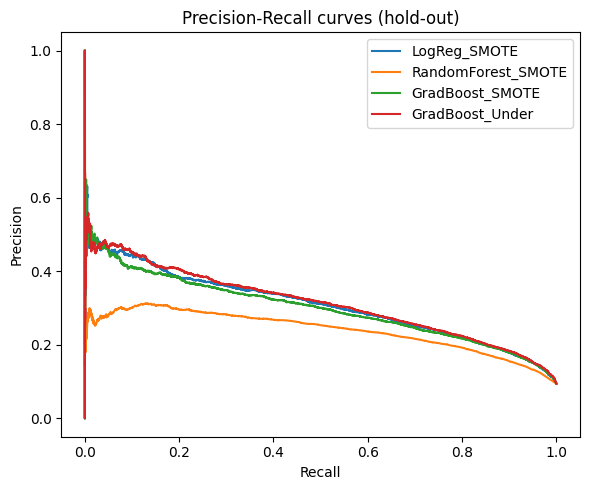

Best model: GradBoost_Under
        Feature  Importance
12          Age    0.328899
0        HighBP    0.253855
10     PhysHlth    0.113995
1      HighChol    0.094874
11          Sex    0.065267
4      Diabetes    0.048010
14       Income    0.045404
3        Smoker    0.025557
2           BMI    0.006658
9      MentHlth    0.004770
20  Age_grp_55+    0.003647
13    Education    0.003140


In [2]:
# Evaluate multiple models with class-imbalance strategies on a consistent hold-out split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, average_precision_score, accuracy_score, f1_score, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart = pd.read_csv('heartdisease.csv')
heart['HeartDiseaseorAttack'] = heart['HeartDiseaseorAttack'].astype(int)

# Feature engineering
heart['BMI_cat'] = pd.cut(heart['BMI'], bins=[0,18.5,25,30,100], labels=['Under/Normal','Overweight','Obese','Severely Obese'])
heart['Age_grp'] = pd.cut(heart['Age'], bins=[0,5,9,11,13], labels=['18-34','35-44','45-54','55+'])

X = heart.drop('HeartDiseaseorAttack', axis=1)
y = heart['HeartDiseaseorAttack']

cat_cols = ['BMI_cat','Age_grp']
num_cols = [c for c in X.columns if c not in cat_cols]

pre = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

models = {
    'LogReg_SMOTE': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'RandomForest_SMOTE': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradBoost_SMOTE': GradientBoostingClassifier(random_state=42),
}

results = []
pr_curves = {}

for name, clf in models.items():
    pipe = ImbPipeline([
        ('pre', pre),
        ('bal', SMOTE(random_state=42)),
        ('clf', clf)
    ])
    pipe.fit(X_train, y_train)
    probs = pipe.predict_proba(X_test)[:,1]
    preds = (probs>=0.5).astype(int)
    pr_auc = average_precision_score(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append({'Model': name, 'PR_AUC': pr_auc, 'ROC_AUC': roc_auc, 'Accuracy': acc, 'F1': f1})
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_curves[name] = (recall, precision)

# Gradient Boosting with RandomUnderSampler for comparison
pipe_under = ImbPipeline([
    ('pre', pre),
    ('bal', RandomUnderSampler(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])
pipe_under.fit(X_train, y_train)
probs_under = pipe_under.predict_proba(X_test)[:,1]
preds_under = (probs_under>=0.5).astype(int)
results.append({
    'Model': 'GradBoost_Under',
    'PR_AUC': average_precision_score(y_test, probs_under),
    'ROC_AUC': roc_auc_score(y_test, probs_under),
    'Accuracy': accuracy_score(y_test, preds_under),
    'F1': f1_score(y_test, preds_under)
})
precision_u, recall_u, _ = precision_recall_curve(y_test, probs_under)
pr_curves['GradBoost_Under'] = (recall_u, precision_u)

results_df = pd.DataFrame(results)
print(results_df)

# Plot Precision-Recall curves
plt.figure(figsize=(6,5))
for name, (recall, precision) in pr_curves.items():
    plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves (hold-out)')
plt.legend()
plt.tight_layout()
plt.show()

# Identify most important drivers from best PR_AUC model (choose highest)
best_name = results_df.sort_values('PR_AUC', ascending=False).iloc[0]['Model']
print('Best model:', best_name)

best_pipe = None
if best_name == 'GradBoost_Under':
    best_pipe = pipe_under
else:
    # recreate corresponding pipeline and fit on full data for global importances
    clf = models[best_name]
    best_pipe = ImbPipeline([
        ('pre', pre),
        ('bal', SMOTE(random_state=42)),
        ('clf', clf)
    ])
    best_pipe.fit(X, y)

# Extract feature names after preprocessing
onehot = best_pipe.named_steps['pre'].named_transformers_['cat']
cat_feature_names = onehot.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Tree models provide feature_importances_
importances = best_pipe.named_steps['clf'].feature_importances_
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False).head(12)
print(fi_df)